In [1]:
import numpy as np
import matplotlib
import pandas as pd

%matplotlib inline


#Suavizado con ajuste de tendencia
def ESWTA(alpha, delta, y_0,t_0,x):
    w= np.empty(len(x),float)
    z= np.empty(len(x),float)
    y= np.empty(len(x),float)
    z[0]=y_0
    w[0]=t_0
    y[0]=z[0]+ w[0]
    for i in range(1,len(x)):
         z[i]=x[i-1]*alpha + y[i-1]*(1-alpha)
         w[i]=w[i-1]+ delta*(z[i]-y[i-1])
         y[i]=z[i]+w[i]
    return y.copy()
data=[110,134,162,180,118,109,114,173,154,132]
pred_eswta = ESWTA(0.5,0.5,110,3,data)
df=pd.DataFrame()
df['data'] = data
df['secadt_opt']= pred_eswta
df


,data,secadt_opt
0,110,113.000000
1,134,113.750000
2,162,131.187500
3,180,161.609375
4,118,190.417969
5,109,155.717773
6,114,122.188232
7,173,105.876404
8,154,144.001389
9,132,156.063534


<AxesSubplot:>

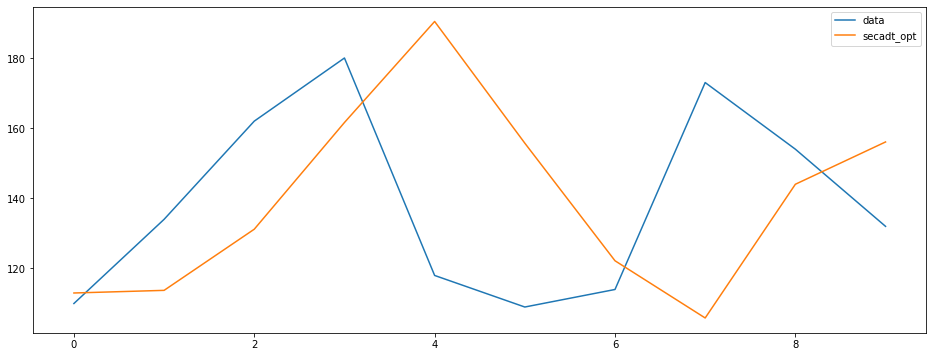

In [2]:
#Gráfico
df[['data','secadt_opt']].plot(figsize=(16,6))

In [4]:
#MAD
def MADn(data,pred,n):
    aux=0
    j=0
    while np.isnan(pred[j]):
        j+=1
    for i in range (j,n+j): 
        aux+=abs(data[i]-pred[i])
    resultado=aux/n
    return resultado

MADn(data,pred_eswta,10)

30.096284103393554

In [5]:
#TS
def TSn(data,pred,n):
    aux=0
    aux2=0
    j=0
    while np.isnan(pred[j]):
        j+=1
    for i in range(j,n+j):
        aux+= data[i]-pred[i]
        aux2+= abs(data[i] - pred[i])
    resultado=n*(aux/aux2)
    return resultado
    
TSn(data,pred_eswta,10)

-0.2595727673188581